In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore


#### Знакомство с данными, обработка пропусков и выбросов

In [2]:
df_balances = pd.read_csv('data/raw/bank_fin.csv', sep = ';')

In [3]:
# исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?

df_balances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


Пропуски в колонке balance

In [4]:
df_balances.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,"2 343,00 $",yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,"45,00 $",no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,"1 270,00 $",yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,"2 476,00 $",yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,"184,00 $",no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df_balances.job.unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

В колонке job пропущенные значения обозначены отдельным словом - unknown

In [6]:
df_balances.balance = df_balances.balance.apply(lambda x: float("".join(x.split()[:-1]).replace(",", ".")) if not pd.isna(x) else x)

In [7]:
df_balances.balance = df_balances.balance.fillna(df_balances.balance.median())

In [8]:
df_balances.balance.head()

0    2343.0
1      45.0
2    1270.0
3    2476.0
4     184.0
Name: balance, dtype: float64

In [9]:
df_balances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11162 non-null  int64  
 1   job        11162 non-null  object 
 2   marital    11162 non-null  object 
 3   education  11162 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  float64
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


#### Обработка выбросов в balance

<Axes: title={'center': 'Распределение признака balance'}, xlabel='balance', ylabel='Count'>

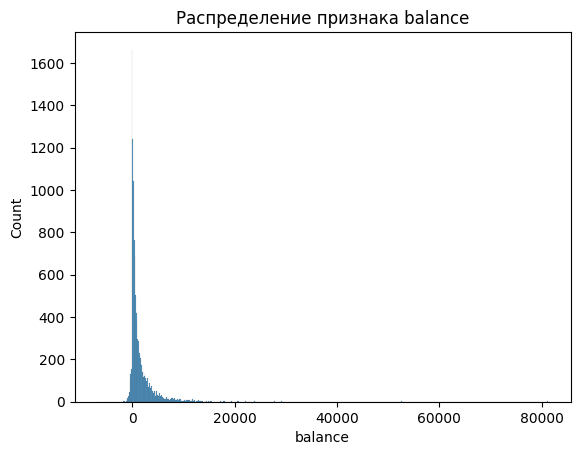

In [10]:
plt.title("Распределение признака balance")
sns.histplot(df_balances.balance)

#### Определение выбросов несколькими методами 

In [11]:
df_balances.shape

(11162, 17)

In [12]:
METHOD_ANOMALY_PROCESSING = "ZSCORE"       # ["IQR", "ZSCORE"]

if METHOD_ANOMALY_PROCESSING == "IQR":
    print("Используем метод Тьюки")
    # Расчет Q1 и Q3
    Q1 = df_balances['balance'].quantile(0.25)
    Q3 = df_balances['balance'].quantile(0.75)
    IQR = Q3 - Q1

    # Определение границ для выбросов
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_balances = df_balances[(df_balances['balance'] >= lower_bound) & (df_balances['balance'] <= upper_bound)]
elif METHOD_ANOMALY_PROCESSING == "ZSCORE":
    print("Используем метод Z-оценки")
    zscore_values = zscore(df_balances['balance'])
    df_balances = df_balances[zscore_values.abs() <= 3]  # Можно выбрать другое пороговое значение, например 2.5 или 3.5

Используем метод Z-оценки


In [13]:
df_balances.shape

(10989, 17)

In [14]:
df_balances.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10989 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        10989 non-null  int64  
 1   job        10989 non-null  object 
 2   marital    10989 non-null  object 
 3   education  10989 non-null  object 
 4   default    10989 non-null  object 
 5   balance    10989 non-null  float64
 6   housing    10989 non-null  object 
 7   loan       10989 non-null  object 
 8   contact    10989 non-null  object 
 9   day        10989 non-null  int64  
 10  month      10989 non-null  object 
 11  duration   10989 non-null  int64  
 12  campaign   10989 non-null  int64  
 13  pdays      10989 non-null  int64  
 14  previous   10989 non-null  int64  
 15  poutcome   10989 non-null  object 
 16  deposit    10989 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.5+ MB


In [15]:
#Обрабатываем пропуски в категориальных признаках: job и education, заменив их на модальные значения
job_mode = df_balances.job.mode()[0]
education_mode = df_balances.education.mode()[0]

df_balances.job = df_balances.job.apply(lambda x: job_mode if x == "unknown" else x)
df_balances.education = df_balances.education.apply(lambda x: education_mode if x == "unknown" else x)

In [16]:
# удаляем все выбросы для признака balance
df_balances = df_balances.dropna(subset=["balance"])

В коде представлен дополнительный меотд фильтрации выбросов
В качестве нового метода был использован метод z-zscore
Z-оценка измеряет отклонение каждого значения от среднего, выраженное в единицах стандартного отклонения.
Выбросы определяются как значения, Z-оценка которых превышает порог, 3.
Код был несколько раз запущен с разными типами фильтрации, полученные результаты:
Итоговые значения метрик при использовании IQR фильтрации:
- accuracy:  0.8350824587706147
- f1 score:  0.8262792166771953
- precision:  0.8069093152375078
- recall:  0.8466019417475729

Итоговые значения метри при использовании Z-score:
- accuracy:  0.8293355390129584
- f1 score:  0.823193373321908
- precision:  0.8063794068270845
- recall:  0.8407234539089848

Таким образом, лучше себя показал изначальный подход IQR. Это объясняется тем что он не требует предположения о нормальности распределения признака

#### Преобразование данных

In [17]:
# преобразуем  уровни образования
df_balances.education.unique()

array(['secondary', 'tertiary', 'primary'], dtype=object)

In [18]:
dct_to_transform = {"primary": 1, "secondary": 2, "tertiary": 3}
df_balances.education = df_balances.education.apply(lambda x: dct_to_transform[x])

In [19]:
# преобразуем бинарные переменные в представление из нулей и единиц
df_balances.head()

binary_variables = ["default", "housing", "loan"]

for bin_var in binary_variables:
    df_balances[bin_var] = (df_balances[bin_var] == "yes").astype(int)

In [20]:
df_balances.deposit = (df_balances.deposit == "yes").astype(int)

In [21]:
# найдем столбцы с типом object
for column in df_balances.columns:
    if df_balances[column].dtype == "object":
        print(column, df_balances[column].unique().shape[0], df_balances[column].dtype)

job 11 object
marital 3 object
contact 3 object
month 12 object
poutcome 4 object


In [22]:
df_balances.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,2,0,2343.0,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,2,0,45.0,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,2,0,1270.0,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,2,0,2476.0,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,3,0,184.0,0,0,unknown,5,may,673,2,-1,0,unknown,1


In [23]:
from sklearn.preprocessing import OneHotEncoder

vars_for_dummy = ["job", "marital", "contact", "month", "poutcome"]

for var in vars_for_dummy:
    enc = OneHotEncoder(drop="first").fit(df_balances[var].values.reshape((-1, 1)))
    tmp = enc.transform(df_balances[var].values.reshape((-1, 1))).toarray()
    tmp = pd.DataFrame(tmp, columns=enc.categories_[0][1:])
    tmp.columns = tmp.columns.map(''.join)
    tmp.columns = [var + "_" + i for i in tmp.columns]
    df_balances = pd.concat([df_balances.reset_index(drop=True), tmp], axis=1)
    df_balances.drop(var, inplace=True, axis=1)

Закодировали остальные переменные с помощью OneHotEncoder
ДОПОЛНЕНИЕ: для исключения мультиколлениарности будем отбрасывать первый столбец, ведь его значение однозначно определяют остальные n-1 столбцов

<Axes: >

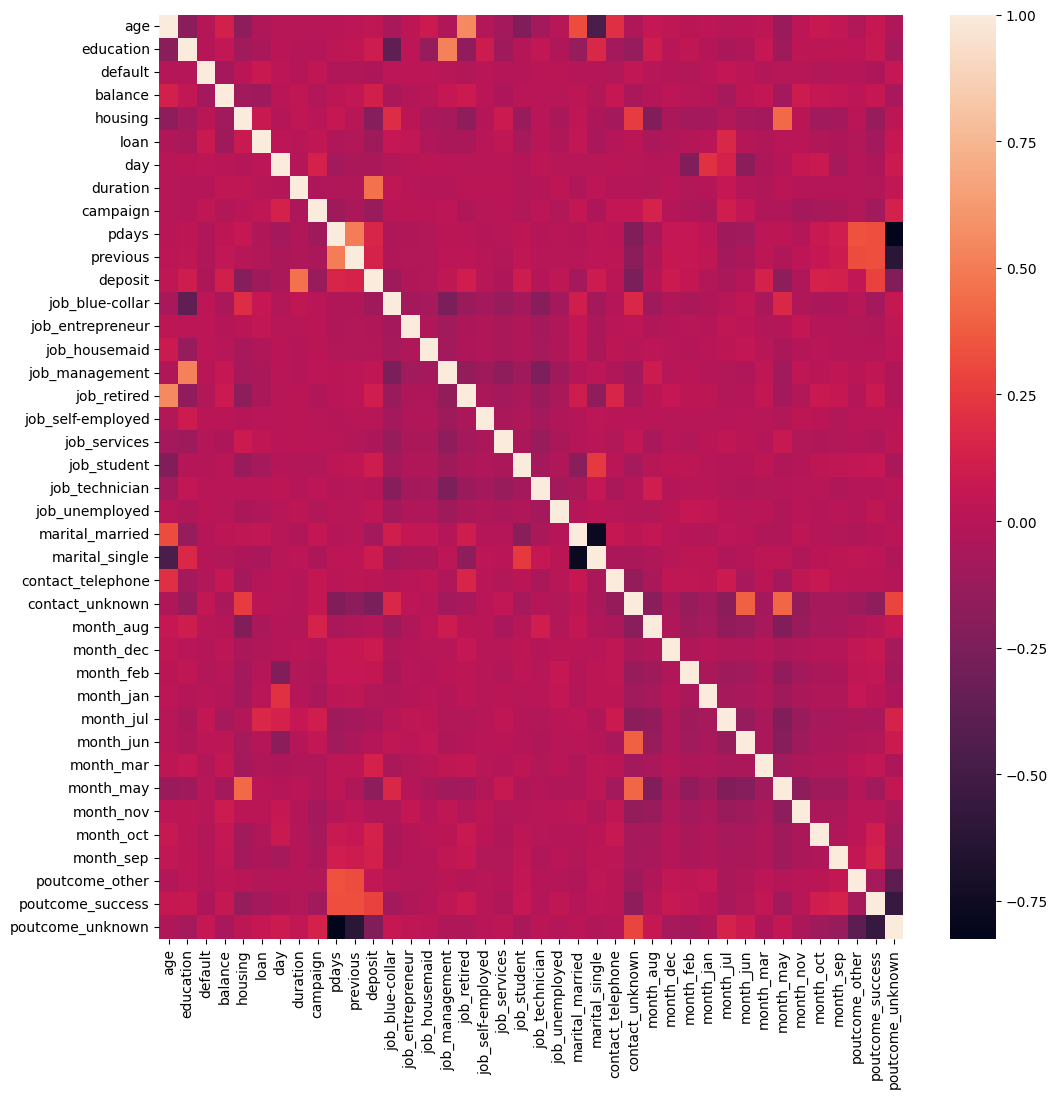

In [24]:
# построим корреляционную матрицу для оценки данных на предмет наличия мультиколлинеарности
plt.figure(figsize=(12, 12))
sns.heatmap(df_balances.corr())